## Analysing IMDb Reviews

In this code demonstration,
- We will do some **text preprocessing steps**.
- Then, we will create features using **Bag of Words model** and **TF-IDF model**.
- Finally, we will build the **logistic regression model**.




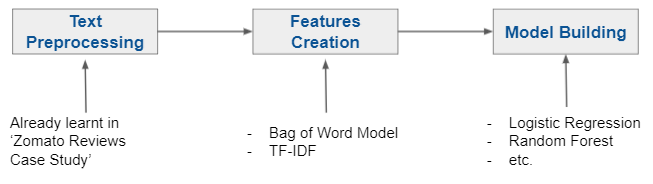

### Import libraries

To start off, you will import the required libraries for visualising and analysing the text data.

In particular, Beautiful Soup is a commonly used Python library for parsing HTML and XML files.

In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
from bs4 import BeautifulSoup
import re,string

import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Read input data

In [4]:
#Importing the training data
imdb=pd.read_csv('/content/gdrive/MyDrive/IMDB Dataset.csv',nrows=10000)
print(imdb.shape)
imdb.head(10)

(10000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


### Preprocessing IMDB Reviews

In [5]:
#Collating all functions together and applying them for the 'IMDb reviews' dataset
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols                                                                         
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

#Text-encoding: UTF-8 encoder
def to_unicode(text):
    if isinstance(text, float):
        text = str(text)
    if isinstance(text, int):
        text = str(text)
    if not isinstance(text, str):
        text = text.decode('utf-8', 'ignore')
    return text

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = to_unicode(text)
    text = strip_html(text)
    text = re.sub(r"http\S+", "", text)
    text = deEmojify(text)
    text = text.encode('ascii', 'ignore')
    text = to_unicode(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = text.lower()
    return text


In [ ]:
#Raw example of a randomly selected review
imdb['review'][111]

"I liked Boyle's performance, but that's about the only positive thing I can say. Everything was overdone to the point of absurdity. Most of the actors spoke like you would expect your 9-year-old nephew to speak if he were pretending to be a jaded, stone-hearted cop, or an ultra-evil villain. The raspy voice-overs seemed amateurish to me. I could go buy a cheap synthesizer and crank out better opening music. And what's with the whole 1984ish police torture stuff? It was totally superfluous and had nothing to do with the actual events of the story. Cox added a lot of things, in fact, that he apparently thought would be really cool, but had nothing to do with the story. That's a big disappointment because one of the things that makes Borges' stories so good is his minimalism -- they are tightly bound, with no superfluous details. This movie is just the opposite. I stopped watching after the scene where Lonnrot is questioning the guy from the Yidische Zaitung, or thereabouts. I wasted $4 

In [6]:
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

imdb['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [ ]:
#Processed example of a randomly selected review
imdb['review'][111]

'i liked boyles performance but thats about the only positive thing i can say everything was overdone to the point of absurdity most of the actors spoke like you would expect your 9yearold nephew to speak if he were pretending to be a jaded stonehearted cop or an ultraevil villain the raspy voiceovers seemed amateurish to me i could go buy a cheap synthesizer and crank out better opening music and whats with the whole 1984ish police torture stuff it was totally superfluous and had nothing to do with the actual events of the story cox added a lot of things in fact that he apparently thought would be really cool but had nothing to do with the story thats a big disappointment because one of the things that makes borges stories so good is his minimalism  they are tightly bound with no superfluous details this movie is just the opposite i stopped watching after the scene where lonnrot is questioning the guy from the yidische zaitung or thereabouts i wasted 4 renting this but at least i can 

### Removing stopwords

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

#Tokenization of text
tokenizer=ToktokTokenizer() #for every function

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [8]:
from nltk.tokenize import word_tokenize,sent_tokenize

#You can either remove stopwords before or after stemming. But since this is a review context, we expect users to have used many different words and we did
# stemming before filtering for stopwords.

stop=set(stopwords.words('english'))
print(stop)

#Removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
imdb['review']=imdb['review'].apply(remove_stopwords)

{'wasn', 'don', 'under', 'not', "needn't", 'i', 'haven', 'weren', 'our', 'at', 'nor', 'its', "it's", 'does', 't', 'y', 'theirs', 'this', 'during', 'having', 'which', 'needn', 'own', 'my', 'being', "shan't", 'has', 'your', "that'll", 'have', 'through', "isn't", 'or', 'by', 'do', 'himself', 'yourself', 'we', "you've", 'am', 'some', 'than', 'mightn', 'hadn', 's', 'll', 'where', 'they', 'what', 'these', 'no', 'each', "you'd", 'yours', 'very', 've', 'ours', 'further', 'when', 'too', 'how', 'had', 'doing', 'those', 're', 'why', 'who', "doesn't", 'more', 'itself', 'hasn', "weren't", 'over', 'whom', "aren't", "won't", 'most', 'wouldn', 'did', "wouldn't", 'to', 'themselves', 'their', 'off', 'them', 'there', 'shan', 'but', 'm', 'on', "couldn't", "haven't", 'his', 'below', 'the', 'for', 'any', 'couldn', 'a', "hasn't", 'are', 'other', 'doesn', 'he', 'yourselves', "should've", 'mustn', 'won', 'between', 'here', 'she', 'myself', 'once', 'will', 'now', 'isn', 'with', 'up', 'before', 'out', 'all', 'an

In [9]:
#Example of randomly selected review text
imdb['review'][678]

'adenoid hynkel lowly soldier world war one rises subsequent years become ruthless dictator toumania creates aggressive antisemitic war machine cultivates little toothbrush moustache sound like anyone knowfrom safety hollywood chaplin uses soapbox exhort europe take arms defy hitler mussolini given united states 1940 year neutrality ahead strong desire embroil europes civil strife remember hitler declared war usa way round surprising chaplin allowed distribute immoderate polemicthe story involves one hand vulgar repellant hynkel reign terror ineptly presides life jewish ghetto every single person friendly humane brave etc etc chaplin hynkel also plays jewish barber little hero ghetto tramp name needless say chaplin writes directs stars composes music cateringin 1940 full truth yet known third reich chaplin forgiven something less perfect historical foresight even standards day gets hitler badly wrong comedian sentimentalist chaplin tries ridicule hitler making hynkel silly hapless huma

### Stemming and Lemmatization

Stemming is rule-based, it omits the last few letters like 'ing', 'ed', 'es' and more. It is fast but may create strange words.
Lemmatizing is dictionary-based, where it translates all words to the root form, like 'went' to 'go', 'going' to 'go' and more. 
Generally we prefer lemmatizing, but it might take some time in large datasets. 

In [10]:
from nltk.stem import WordNetLemmatizer,SnowballStemmer
nltk.download('wordnet')

def simple_stemmer(text):
    ps=SnowballStemmer(language='english')
    return ' '.join([ps.stem(word) for word in tokenizer.tokenize(text)])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
imdb['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [ ]:
%time simple_stemmer(imdb['review'][1])

CPU times: user 2.19 ms, sys: 0 ns, total: 2.19 ms
Wall time: 2.3 ms


'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrif written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particular scene concern orton halliwel set particular flat halliwel mural decor everi surfac terribl well done'

In [11]:
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#Lemmatizer example
def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    for word, tag in pos_tag(word_tokenize(sentence)):
        if tag.startswith("NN"):
            yield wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            yield wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            yield wnl.lemmatize(word, pos='a')
        else:
            yield word
            
def lemmatize_text(text):
    return ' '.join(lemmatize_all(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
imdb['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

In [ ]:
%time lemmatize_text(imdb['review'][1])

CPU times: user 9.99 ms, sys: 1.01 ms, total: 11 ms
Wall time: 10.9 ms


'wonderful little production film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece actor extremely well choose michael sheen get polari voice pat truly see seamless edit guided reference williams diary entry well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remain solid disappears play knowledge sens particularly scene concern orton halliwell set particularly flat halliwells mural decorate every surface terribly well do'

In [12]:
imdb['review'] = imdb['review'].apply(simple_stemmer)

In [ ]:
#Example of randomly selected review text
imdb['review'][456]

'oh good would never thought possibl see thriller wors domest disturb soon arm rotten plot terribl edit stilt act headacheinduc style sorri word sanctimoni kind movi almost forc reevalu entir genr film bad even thriller condemn complet failur seem littl betternow sanctimoni terribl film also succeed difficult task rip better movi pathet job right main titl noth blatant attempt reproduc one se7en impress someth didnt smell quit right soon movi start seri corni wannab hip quickcut full gori imag bombast color knew smell come fromit turn two policemen rather policeman jim renart michael par policewoman dorothi smith jennif rubin investig murder spree vancouv serial killer known monkey killer menac chill nicknam uh work method kill quit lot peopl see nut appar work follow proverb see evil hear evil speak evil cut eye ear tongu victim far six eye six ear three tongu ingeni fashion renart smith figur monkey killer probabl go kill three peopl well probabl want complet number 666 sudden film f

## Creating features using **Bag of words** model and building the Logistic Regression model

In [13]:
#Transformed train reviews
norm_reviews=imdb.review

### Binarisation of Sentiments: Positive: 1, Negative: 0

In [14]:
from sklearn.preprocessing import LabelBinarizer

#Labelling the sentient data
lb=LabelBinarizer()

#Transformed sentiment data
sentiment_data=lb.fit_transform(imdb['sentiment'])
print(sentiment_data.shape)

(10000, 1)


### Fitting the bag of words model on the entire dataset

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#Creating a matrix with reviews in row and unique words as columns and frequency of word in review as values.
#Count vectorizer for bag of words
cv=CountVectorizer()

#Fitting model on entire data
cv_fit = cv.fit(norm_reviews)

### Transform the train and the test dataset separately

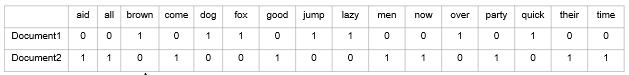

In [16]:
#Normalised train reviews
norm_train_reviews=imdb.review[:8000]
print('train:','\n',norm_train_reviews[0])
norm_train_cv_reviews=cv_fit.transform(norm_train_reviews)

#Normalised test reviews
norm_test_reviews=imdb.review[8000:]
print('test:','\n',norm_test_reviews[8001])
norm_test_cv_reviews=cv_fit.transform(norm_test_reviews)

train: 
 one review mention watch 1 oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may bec

In [79]:
y.head()

,0
,bad movie


### Splitting the output variable (sentiments) into test and train

In [17]:
#Splitting the sentiment data
train_sentiments=sentiment_data[:8000]
test_sentiments=sentiment_data[8000:]

In [18]:
#Calculating sentiment count
imdb['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
n_w=norm_train_cv_reviews.shape[1]

In [28]:
model=Sequential()
model.add(Dense(50,input_shape=(n_w,),activation='relu'))
model.add(Dense(20,activation='relu'))
#model.add(Dense(25,activation='relu'))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
history=model.fit(norm_train_cv_reviews,train_sentiments,epochs=10,verbose=2)

Epoch 1/10
250/250 - 2s - loss: 1.2994e-04 - accuracy: 0.9999
Epoch 2/10
250/250 - 2s - loss: 1.1145e-04 - accuracy: 1.0000
Epoch 3/10
250/250 - 2s - loss: 9.9620e-05 - accuracy: 1.0000
Epoch 4/10
250/250 - 2s - loss: 9.1203e-05 - accuracy: 1.0000
Epoch 5/10
250/250 - 2s - loss: 8.4909e-05 - accuracy: 1.0000
Epoch 6/10
250/250 - 2s - loss: 7.9686e-05 - accuracy: 1.0000
Epoch 7/10
250/250 - 2s - loss: 7.4915e-05 - accuracy: 1.0000
Epoch 8/10
250/250 - 2s - loss: 7.0658e-05 - accuracy: 1.0000
Epoch 9/10
250/250 - 2s - loss: 6.6912e-05 - accuracy: 1.0000
Epoch 10/10
250/250 - 2s - loss: 6.3086e-05 - accuracy: 1.0000


In [44]:
loss,acc=model.evaluate(norm_test_cv_reviews,test_sentiments)
print("acccuracy",acc*100,"%")

63/63 [==============================] - 0s 5ms/step - loss: 1.2009 - accuracy: 0.8655
acccuracy 86.54999732971191 %


In [85]:
#unseeen external data
t={'':["great movie"]}
y=pd.DataFrame.from_dict(t,orient='index')
test=cv_fit.transform(y[0])

In [84]:
model.predict(test)

array([[0.93818223]], dtype=float32)

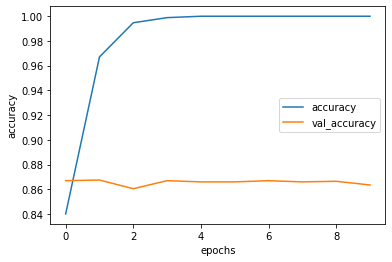

In [30]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###Model building using Bag of words model- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

#Training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for the bag of words
lr_bow=lr.fit(norm_train_cv_reviews,train_sentiments)
print(lr_bow)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Predictions

In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(norm_test_cv_reviews)
print(lr_bow_predict)

[1 1 1 ... 0 0 1]


## Creating features using **TF-IDF** model and building the Logistic Regression model

In [33]:
#Transformed train reviews
norm_reviews=imdb.review

### Fitting TF-IDF model on entire dataset.

In [34]:
#Term-frequencey * inverse document frequency matrix
from sklearn.feature_extraction.text import TfidfVectorizer

#Applying TF-IDF vectorizer
tv=TfidfVectorizer()

#Fitting model on entire data
tv_fit = tv.fit(norm_reviews)

### Transform the train and the test dataset separately

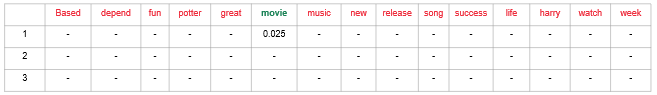

In [35]:
#Normalised train reviews
norm_train_reviews=imdb.review[:8000]
print('train:','\n',norm_train_reviews[0])
norm_train_tv_reviews=tv_fit.transform(norm_train_reviews)

#Normalised test reviews
norm_test_reviews=imdb.review[8000:]
print('test:','\n',norm_test_reviews[8001])
norm_test_tv_reviews=tv_fit.transform(norm_test_reviews)

train: 
 one review mention watch 1 oz episod youll hook right exact happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may bec

In [36]:
n_w_tf=norm_train_tv_reviews.shape[1]

In [ ]:
norm_train_tv_reviews.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
norm_train_tv_reviews

<8000x62623 sparse matrix of type '<class 'numpy.float64'>'
	with 765816 stored elements in Compressed Sparse Row format>

### Splitting the output variable (sentiments) into test and train

In [37]:
#Splitting the sentiment data
train_sentiments=sentiment_data[:8000]
test_sentiments=sentiment_data[8000:]

In [38]:
model_tf=Sequential()
model_tf.add(Dense(50,input_shape=(n_w_tf,),activation='relu'))
model_tf.add(Dense(20,activation='relu'))
#model.add(Dense(25,activation='relu'))

model_tf.add(Dense(1,activation='sigmoid'))
model_tf.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
#history=model_tf.fit(norm_train_tv_reviews,train_sentiments,epochs=20)

### Model building using TF-IDF model- Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

#Training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)

#Fitting the model for tf-idf features
lr_tfidf=lr.fit(norm_train_tv_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Predictions

In [ ]:
#Predicting the model for tf-idf features
lr_tfidf_predict=lr.predict(norm_test_tv_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 0 0 1]


### Model Comparison

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8645
lr_tfidf_score : 0.8675


### Print the Classification Report

In [ ]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.87      0.85      0.86       975
    Negative       0.86      0.88      0.87      1025

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

              precision    recall  f1-score   support

    Positive       0.89      0.83      0.86       975
    Negative       0.85      0.90      0.87      1025

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



In [ ]:
#Confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

#Confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[901 124]
 [147 828]]
[[922 103]
 [162 813]]


## Introducing TextBlob library and predicting sentiment using TextBlob

If you are using Jupyter Notebook, make sure to install textblob in your system.
To do so, open the command prompt and type 'python -m pip install textblob'.

In [ ]:
from textblob import TextBlob
  
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return "negative"
    else:
        return "positive"
    
imdb["textblob"] = imdb["review"].apply(getPolarity)
imdb["textblob_flag"] = imdb["textblob"].apply(getAnalysis)

In [ ]:
imdb.head(10)

,review,sentiment,textblob,textblob_flag
0,one review mention watch 1 oz episod youll hoo...,positive,0.025782,positive
1,wonder littl product film techniqu unassum old...,positive,0.215476,positive
2,thought wonder way spend time hot summer weeke...,positive,0.347143,positive
3,basic there famili littl boy jake think there ...,negative,-0.007143,negative
4,petter mattei love time money visual stun film...,positive,0.193974,positive
5,probabl alltim favorit movi stori selfless sac...,positive,0.025000,positive
6,sure would like see resurrect date seahunt ser...,positive,0.178283,positive
7,show amaz fresh innov idea 70s first air first...,negative,0.128472,positive
8,encourag posit comment film look forward watch...,negative,-0.096296,negative
9,like origin gut wrench laughter like movi youn...,positive,0.233333,positive


In [ ]:
imdb["textblob_flag"] = lb.fit_transform(imdb["textblob_flag"])

In [ ]:
#Classification report predictions from TextBlob
textblob_report=classification_report(test_sentiments,imdb["textblob_flag"][8000:],target_names=['Positive','Negative'])
print(textblob_report)

              precision    recall  f1-score   support

    Positive       0.79      0.39      0.52       975
    Negative       0.61      0.90      0.73      1025

    accuracy                           0.65      2000
   macro avg       0.70      0.65      0.62      2000
weighted avg       0.70      0.65      0.63      2000



In [ ]:
#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.89      0.83      0.86       975
    Negative       0.85      0.90      0.87      1025

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### Word cloud for positive review words

If you are using Jupyter Notebook, make sure to install wordcloud in your system.
To do so, open the command prompt and type 'python -m pip install wordcloud'.

In [ ]:
from wordcloud import WordCloud,STOPWORDS

#Word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show